## Week 11 Lab (Hierarchical Clustering)
### COSC 3337 Dr. Rizk

About The Data
We'll be using the Credit Card Dataset from kaggle for this lab, but feel free to follow along with your own dataset. We will develop a customer segmentation to define marketing strategy. The sample Dataset summarizes the usage behavior of about 9000 active credit card holders during the last 6 months. The file is at a customer level with 18 behavioral variables:

* CUSTID : Identification of Credit Card holder (Categorical)
* BALANCE : Balance amount left in their account to make purchases (
* BALANCEFREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
* PURCHASES : Amount of purchases made from account
* ONEOFFPURCHASES : Maximum purchase amount done in one-go
* INSTALLMENTSPURCHASES : Amount of purchase done in installment
* CASHADVANCE : Cash in advance given by the user
* PURCHASESFREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
* ONEOFFPURCHASESFREQUENCY : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
* PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
* CASHADVANCEFREQUENCY : How frequently the cash in advance being paid
* CASHADVANCETRX : Number of Transactions made with "Cash in Advanced"
* PURCHASESTRX : Numbe of purchase transactions made
* CREDITLIMIT : Limit of Credit Card for user
* PAYMENTS : Amount of Payment done by user
* MINIMUM_PAYMENTS : Minimum amount of payments made by user
* PRCFULLPAYMENT : Percent of full payment paid by user
* TENURE : Tenure of credit card service for user

### About Hierarchical clustering
Hierarchical clustering is a method which seeks to build a hierarchy of clusters. Strategies for hierarchical clustering generally fall into two types:

Agglomerative : This is a "bottom-up" approach: each observation starts in its own cluster, and pairs of clusters are merged as one moves up the hierarchy.
Divisive : This is a "top-down" approach: all observations start in one cluster, and splits are performed recursively as one moves down the hierarchy.
In general, the merges and splits are determined in a greedy manner, and the results of hierarchical clustering are usually presented in a dendrogram.



### Agglomerative Clustering
The algorithm goes as follows:

* Compute the proximity matrix
* Let each data point be a cluster
* Repeat: Merge two closest clusters and update the proximity matrix until 1/ K cluster remains

For example, say we have six data points {a,b,c,d,e,f}

* In the initial step, we consider all the six data points as individual clusters as shown in the image below.

The first step is to determine which elements to merge in a cluster. Usually, we want to take the two closest elements, according to the chosen distance.We construct a distance matrix at this stage, where the number in the i-th row j-th column is the distance between the i-th and j-th elements. Then, as clustering progresses, rows and columns are merged as the clusters are merged and the distances updated.

### Computation of Proximity/Distance Matrix
To calculate the proximity between two clusters, we need to define the distance between them. Usually the distance is one of the following:

* The maximum distance between elements of each cluster (also called complete-linkage clustering )
* The minimum distance between elements of each cluster (also called single-linkage clustering )
* The mean distance between elements of each cluster (also called average linkage clustering )
* The sum of all intra-cluster variance.

Note: Euclidean, Manhattan, Mahalanobis, etc. distance formulas can be used when calculating distances for each of the above.

### Implementation
Similarly to the K Means lab, we'll skip the data exploration portion and jump to implementation, but you're welcome to explore this data, or your own if working with a different dataset.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 15, 5
sns.set_style('darkgrid')

Let's first load the data into a pandas DataFrame. MINIMUM_PAYMENTS and CREDIT_LIMIT are missing a few values, so we'll go ahead and fill them with their respective column mean. We'll also go ahead and drop CUST_ID while we're at it since it serve's us no valuable information.



In [5]:
cc_df = pd.read_csv('cc.csv')
cc_df.drop('CUST_ID', axis = 1, inplace=True) 
cc_df['MINIMUM_PAYMENTS'].fillna(value=cc_df['MINIMUM_PAYMENTS'].mean(), inplace = True) 
cc_df['CREDIT_LIMIT'].fillna(value=cc_df['CREDIT_LIMIT'].mean(), inplace = True) 
cc_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [6]:
cc_df.shape 

(8950, 17)

In [4]:
# making a copy of the original dataset to view its original dimensionality before removing any columns
# cc_df_copy = cc_df.copy()
cc_df_copy = pd.read_csv('cc.csv')
cc_df_copy.head()
cc_df_copy.shape # so it did drop 'CUST_ID'

(8950, 18)

In [7]:
# if you want to drop columns with more than 50% missing values
cc_df_copy.dropna(thresh=len(cc_df) * 0.5, axis=1, inplace=True)
cc_df_copy.head()
cc_df_copy.shape # it kept the same shape as the original copy which indicates that there were not many na's in each column such that exceeds 50%

(8950, 18)

In [15]:
# imputing missing values with the median for numerical columns
cc_df_copy['MINIMUM_PAYMENTS'].fillna(value=cc_df['MINIMUM_PAYMENTS'].median(), inplace=True)

# imputing missing values with the mode for categorical columns
cc_df_copy['CREDIT_LIMIT'].fillna(value=cc_df_copy['CREDIT_LIMIT'].mode()[0], inplace=True)

cc_df_copy.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,335.628312,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [14]:
# # View the data type of each column
# column_types = cc_df_copy.dtypes
# print(column_types)

Checking to see that there are no more missing values:

In [6]:
cc_df.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

We'll now standardize and normalize the data as follows:

In [7]:
from sklearn.preprocessing import StandardScaler, normalize

# standardizing 
scaler = StandardScaler() 
scaled_df = scaler.fit_transform(cc_df) 
  
# normalizing 
normalized_df = normalize(scaled_df) 

# Converting the scaled data back into a pandas DataFrame 
normalized_df = pd.DataFrame(data=normalized_df) 

In [16]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

# check and drop any other non-numeric columns
numeric_df = cc_df.select_dtypes(include=['number'])

# Fit and transform the entire dataset
cc_df_scaled = scaler.fit_transform(cc_df_copy)

# convert the scaled data back to a DataFrame (optional)
# cc_df_scaled = pd.DataFrame(cc_df_scaled, columns=cc_df.columns)

ValueError: could not convert string to float: 'C10001'

Next (optional, but recommended), we will reduce the dimensions of the data using PCA

In [8]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2) 
X_principal = pca.fit_transform(normalized_df) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2'] 
  
X_principal.head()

,P1,P2
0,-0.489825,-0.679678
1,-0.518791,0.545013
2,0.330886,0.268980
3,-0.482374,-0.092111
4,-0.563289,-0.481914


Next, we'll use a dendrogram to visualize the linkage of the reduced data (X_principal) using **method='ward'**.

Note: The cell below might take a while to run.



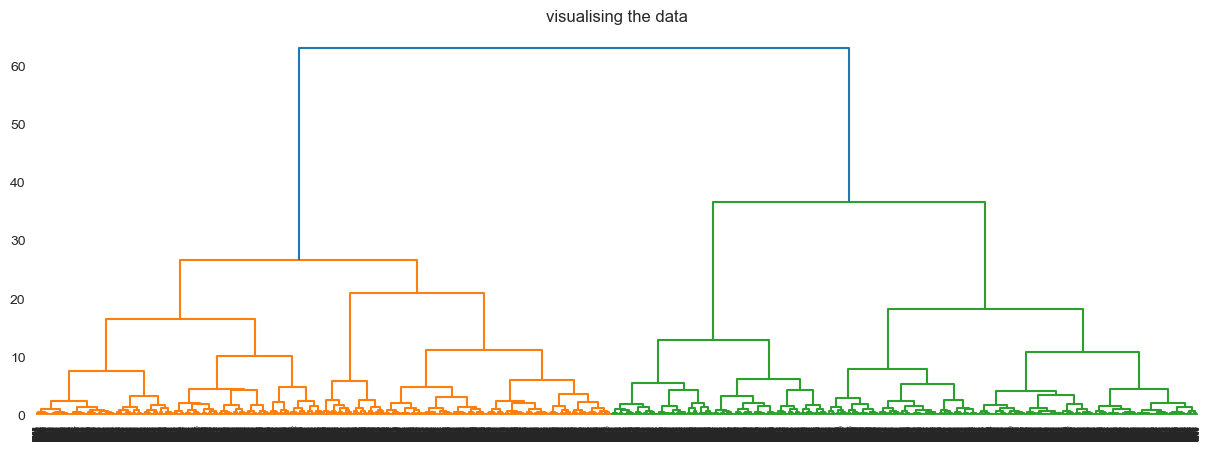

In [10]:
import scipy.cluster.hierarchy as shc

plt.title('visualising the data') 
Dendrogram = shc.dendrogram((shc.linkage(X_principal, method ='ward'))) 

We can also determine the optimal number of clusters using silhouette score:

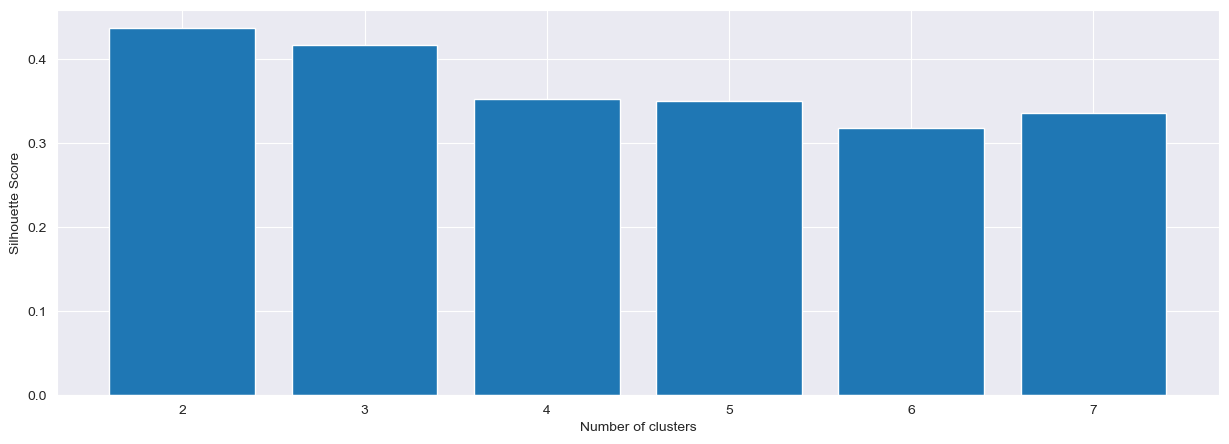

In [11]:
from sklearn.cluster import AgglomerativeClustering 
from sklearn.metrics import silhouette_score

# where we'll save scores for later plotting
silhouette_scores = [] 

# testing different cluster values in range [2,8)
for n_cluster in range(2, 8):
    silhouette_scores.append(silhouette_score(X_principal,
                                              AgglomerativeClustering(n_clusters = n_cluster).fit_predict(X_principal))) 
    
# Creating bar graph to compare the results. You can use a line plot if you prefer (similar to K Means lab)
plt.bar(x=range(2, 8), height=silhouette_scores) 
plt.xlabel('Number of clusters') 
plt.ylabel('Silhouette Score') 
plt.show()

We'll go ahead and build and visualize a clustering model for n_clusters = 3

In [12]:
# creating and fitting model
agg = AgglomerativeClustering(n_clusters=3)
agg.fit(X_principal)

AgglomerativeClustering(n_clusters=3)

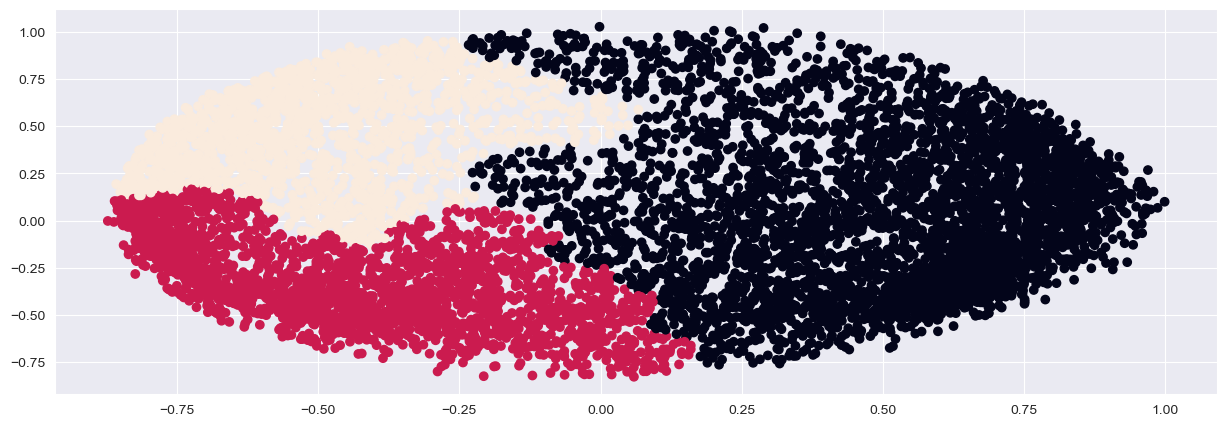

In [13]:
# Visualizing the clustering 
plt.scatter(X_principal['P1'], X_principal['P2'],
            c = AgglomerativeClustering(n_clusters = 3).fit_predict(X_principal)) 
plt.show() 

Congrats! 🙂 Now try repeating the lab steps on your own data for practice.